# Clustering and Visualization 

# Import the required packages

In [296]:
#Basic utility packages
import json
import requests

#Data Manipulatio packages
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

#Data Visualization packages
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

#Geo coordinates package
from geopy.geocoders import Nominatim
import geocoder

#Map package
import folium

#clustering package
from sklearn.cluster import KMeans

# Import the data

In [297]:
df=pd.read_csv(r"C:\Users\WELCOME\Untitled Folder\Final capstone\India city locations.csv")
df

,Unnamed: 0,Unnamed: 0.1,City,Population,State,Latitude,Longitude
0,0,0,Mumbai,"12,442,373",Maharashtra,18.938771,72.835335
1,1,1,Delhi,"11,034,555",Delhi,28.651718,77.221939
2,2,2,Bangalore,"8,443,675",Karnataka,12.979120,77.591300
3,3,3,Hyderabad,"6,731,790",Telangana,17.361608,78.474629
4,4,4,Ahmedabad,"5,577,940",Gujarat,23.021624,72.579707
5,5,5,Chennai,"4,646,732",Tamil Nadu,13.080172,80.283833
6,6,6,Kolkata,"4,496,694",West Bengal,22.567746,88.347602
7,7,7,Surat,"4,467,797",Gujarat,21.186461,72.808128
8,8,8,Pune,"3,124,458",Maharashtra,18.520306,73.854319
9,9,9,Jaipur,"3,046,163",Rajasthan,26.916194,75.820349


# Clean the data

In [298]:
data=df.drop([20]).reset_index(drop=True)

In [299]:
data

,Unnamed: 0,Unnamed: 0.1,City,Population,State,Latitude,Longitude
0,0,0,Mumbai,"12,442,373",Maharashtra,18.938771,72.835335
1,1,1,Delhi,"11,034,555",Delhi,28.651718,77.221939
2,2,2,Bangalore,"8,443,675",Karnataka,12.979120,77.591300
3,3,3,Hyderabad,"6,731,790",Telangana,17.361608,78.474629
4,4,4,Ahmedabad,"5,577,940",Gujarat,23.021624,72.579707
5,5,5,Chennai,"4,646,732",Tamil Nadu,13.080172,80.283833
6,6,6,Kolkata,"4,496,694",West Bengal,22.567746,88.347602
7,7,7,Surat,"4,467,797",Gujarat,21.186461,72.808128
8,8,8,Pune,"3,124,458",Maharashtra,18.520306,73.854319
9,9,9,Jaipur,"3,046,163",Rajasthan,26.916194,75.820349


In [300]:
data.drop(['Unnamed: 0','Unnamed: 0.1'],inplace=True,axis=1)

In [301]:

data.set_value(1,'Latitude',28.7041)
data.set_value(1,'Longitude',77.1025)

C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Population,State,Latitude,Longitude
0,Mumbai,"12,442,373",Maharashtra,18.938771,72.835335
1,Delhi,"11,034,555",Delhi,28.704100,77.102500
2,Bangalore,"8,443,675",Karnataka,12.979120,77.591300
3,Hyderabad,"6,731,790",Telangana,17.361608,78.474629
4,Ahmedabad,"5,577,940",Gujarat,23.021624,72.579707
5,Chennai,"4,646,732",Tamil Nadu,13.080172,80.283833
6,Kolkata,"4,496,694",West Bengal,22.567746,88.347602
7,Surat,"4,467,797",Gujarat,21.186461,72.808128
8,Pune,"3,124,458",Maharashtra,18.520306,73.854319
9,Jaipur,"3,046,163",Rajasthan,26.916194,75.820349


In [302]:
data.set_value(14,'Latitude',19.2183)
data.set_value(14,'Longitude',72.9781)


C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,City,Population,State,Latitude,Longitude
0,Mumbai,"12,442,373",Maharashtra,18.938771,72.835335
1,Delhi,"11,034,555",Delhi,28.704100,77.102500
2,Bangalore,"8,443,675",Karnataka,12.979120,77.591300
3,Hyderabad,"6,731,790",Telangana,17.361608,78.474629
4,Ahmedabad,"5,577,940",Gujarat,23.021624,72.579707
5,Chennai,"4,646,732",Tamil Nadu,13.080172,80.283833
6,Kolkata,"4,496,694",West Bengal,22.567746,88.347602
7,Surat,"4,467,797",Gujarat,21.186461,72.808128
8,Pune,"3,124,458",Maharashtra,18.520306,73.854319
9,Jaipur,"3,046,163",Rajasthan,26.916194,75.820349


In [303]:
data.set_value(16,'Latitude',17.6868)
data.set_value(16,'Longitude',83.2185)


C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,City,Population,State,Latitude,Longitude
0,Mumbai,"12,442,373",Maharashtra,18.938771,72.835335
1,Delhi,"11,034,555",Delhi,28.704100,77.102500
2,Bangalore,"8,443,675",Karnataka,12.979120,77.591300
3,Hyderabad,"6,731,790",Telangana,17.361608,78.474629
4,Ahmedabad,"5,577,940",Gujarat,23.021624,72.579707
5,Chennai,"4,646,732",Tamil Nadu,13.080172,80.283833
6,Kolkata,"4,496,694",West Bengal,22.567746,88.347602
7,Surat,"4,467,797",Gujarat,21.186461,72.808128
8,Pune,"3,124,458",Maharashtra,18.520306,73.854319
9,Jaipur,"3,046,163",Rajasthan,26.916194,75.820349


In [304]:
data.set_value(22,'Latitude',19.9975)
data.set_value(22,'Longitude',73.7898)
data

C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,City,Population,State,Latitude,Longitude
0,Mumbai,"12,442,373",Maharashtra,18.938771,72.835335
1,Delhi,"11,034,555",Delhi,28.704100,77.102500
2,Bangalore,"8,443,675",Karnataka,12.979120,77.591300
3,Hyderabad,"6,731,790",Telangana,17.361608,78.474629
4,Ahmedabad,"5,577,940",Gujarat,23.021624,72.579707
5,Chennai,"4,646,732",Tamil Nadu,13.080172,80.283833
6,Kolkata,"4,496,694",West Bengal,22.567746,88.347602
7,Surat,"4,467,797",Gujarat,21.186461,72.808128
8,Pune,"3,124,458",Maharashtra,18.520306,73.854319
9,Jaipur,"3,046,163",Rajasthan,26.916194,75.820349


In [305]:
data=data.sort_values(by=['City']).reset_index(drop=True)

In [306]:
data

,City,Population,State,Latitude,Longitude
0,Agra,"1,585,704",Uttar Pradesh,27.175255,78.009816
1,Ahmedabad,"5,577,940",Gujarat,23.021624,72.579707
2,Bangalore,"8,443,675",Karnataka,12.979120,77.591300
3,Bhopal,"1,798,218",Madhya Pradesh,23.253092,77.396272
4,Chennai,"4,646,732",Tamil Nadu,13.080172,80.283833
5,Delhi,"11,034,555",Delhi,28.704100,77.102500
6,Faridabad,"1,414,050",Haryana,28.402837,77.308563
7,Hyderabad,"6,731,790",Telangana,17.361608,78.474629
8,Indore,"1,964,086",Madhya Pradesh,22.720385,75.868210
9,Jaipur,"3,046,163",Rajasthan,26.916194,75.820349


# Create a map

The map is created with the help of folium.

In [307]:
address = 'India'

geolocator = Nominatim(user_agent = 'my-application')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("Latitude: {}, Longitude: {}".format(latitude, longitude))

Latitude: 22.3511148, Longitude: 78.6677428


In [308]:
india_map = folium.Map(location = [latitude, longitude], zoom_start = 5)

for lat, lng, city in zip(data['Latitude'], data['Longitude'], data['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, lng], 
    radius = 5, 
    popup = label, 
    color = 'blue', 
    fill = True, 
    fill_color = '#3186cc', 
    fill_opacity = 0.7).add_to(india_map)
    
india_map

# Foursquare

With the help of Foursqure API, the top popular restaurants are obtained.

In [309]:
CLIENT_ID = 'B5LM2D4ITE0MQZ44PCXWLVG53NDALKXKVDTN5JKAEJJGIIB5' 
CLIENT_SECRET = '4NMGAXV5PRYEKT4FUYOP2NL3JZ3LB353HXSWIZNEKZSPEFMA' 
VERSION = '20181204'

print("My Credentials: ")
print("CLIENT_ID: " + CLIENT_ID)
print("CLIENT_SECRET: " + CLIENT_SECRET)

My Credentials: 
CLIENT_ID: B5LM2D4ITE0MQZ44PCXWLVG53NDALKXKVDTN5JKAEJJGIIB5
CLIENT_SECRET: 4NMGAXV5PRYEKT4FUYOP2NL3JZ3LB353HXSWIZNEKZSPEFMA


In [310]:
def gettopVenues(names, latitudes, longitudes, radius=4000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    top_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    top_venues.columns = ['City', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(top_venues)

In [311]:
LIMIT=10
venues_City = gettopVenues(names=data['City'],
                                   latitudes=data['Latitude'],
                                   longitudes=data['Longitude']
                                  )

Agra
Ahmedabad
Bangalore
Bhopal
Chennai
Delhi
Faridabad
Hyderabad
Indore
Jaipur
Kanpur
Kolkata 
Lucknow
Ludhiana
Mumbai
Nagpur
Nashik
Patna
Pimpri-Chinchwad
Pune
Surat
Thane
Vadodara
Visakhapatnam


In [312]:
print(venues_City.shape)
venues_City.head()

(232, 7)


,City,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agra,27.175255,78.009816,Agra Fort | आगरा का किला | آگرہ قلعہ (Agra Fort),27.176607,78.022290,Historic Site
1,Agra,27.175255,78.009816,Mama Chicken Franky House,27.160583,78.011463,Fried Chicken Joint
2,Agra,27.175255,78.009816,Grand Imperial,27.173407,78.008958,Hotel
3,Agra,27.175255,78.009816,Taj Mahal | ताज महल | تاج محل (Taj Mahal),27.171047,78.042187,Historic Site
4,Agra,27.175255,78.009816,Mehtab Bagh | मेहताब बाग़ | ماہتاب باغ (Mehtab...,27.180001,78.042090,Garden


In [313]:
venues_City.groupby('City').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Agra,10,10,10,10,10,10
Ahmedabad,10,10,10,10,10,10
Bangalore,10,10,10,10,10,10
Bhopal,10,10,10,10,10,10
Chennai,10,10,10,10,10,10
Delhi,10,10,10,10,10,10
Faridabad,10,10,10,10,10,10
Hyderabad,10,10,10,10,10,10
Indore,10,10,10,10,10,10


In [314]:
print('There are {} uniques categories.'.format(len(venues_City['Venue Category'].unique())))

There are 68 uniques categories.


In [315]:
onehot_City = pd.get_dummies(venues_City[['Venue Category']], prefix = '', prefix_sep = "")

onehot_City['City'] = venues_City['City']

fixed_columns = [onehot_City.columns[-1]] + list(onehot_City.columns[:-1])
onehot_City = onehot_City[fixed_columns]

onehot_City.head()

,City,Airport,Asian Restaurant,BBQ Joint,Bakery,Bookstore,Bowling Alley,Burger Joint,Café,Chinese Restaurant,...,Scenic Lookout,Seafood Restaurant,Shopping Mall,Snack Place,South Indian Restaurant,Sports Bar,Tea Room,Theme Park,Toll Plaza,Train Station
0,Agra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [316]:
suffixes=["BBQ Joint", "Burger Joint", "Restaurant","Tea Room"]

In [317]:
group_City = onehot_City.groupby('City').mean().reset_index()
group_City

,City,Airport,Asian Restaurant,BBQ Joint,Bakery,Bookstore,Bowling Alley,Burger Joint,Café,Chinese Restaurant,...,Scenic Lookout,Seafood Restaurant,Shopping Mall,Snack Place,South Indian Restaurant,Sports Bar,Tea Room,Theme Park,Toll Plaza,Train Station
0,Agra,0.1,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
1,Ahmedabad,0.0,0.0,0.000,0.000,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,0.000,0.0
2,Bangalore,0.0,0.1,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.000,0.0
3,Bhopal,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.000,0.0
4,Chennai,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.000,0.0
5,Delhi,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.000,0.0
6,Faridabad,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
7,Hyderabad,0.0,0.0,0.000,0.100,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.1,0.2,0.0,0.0,0.0,0.000,0.0
8,Indore,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
9,Jaipur,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.000,0.0


In [318]:
group_City_names = group_City['City']


In [319]:

group_City = group_City.loc[:, group_City.columns.str.endswith('Restaurant')]
group_City.head()

,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Multicuisine Indian Restaurant,Parsi Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant
0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.1,0.0,0.2,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [320]:
group_City_BBQ = group_City.loc[:, group_City.columns.str.endswith('BBQ Joint')]

In [321]:
group_City['City'] = group_City_names

C:\Users\WELCOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [322]:
cols = list(group_City)
cols.insert(0, cols.pop(cols.index('City')))
group_City = group_City.loc[:, cols]
group_City.head()

,City,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Multicuisine Indian Restaurant,Parsi Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant
0,Agra,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ahmedabad,0.0,0.0,0.1,0.0,0.2,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2,Bangalore,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bhopal,0.0,0.0,0.0,0.0,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chennai,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
num_top_venues = 6

for City  in group_City['City']:
    print("----"+City+"----")
    temp = group_City[group_City['City'] == City].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agra----
                  venue  freq
0     Indian Restaurant   0.2
1      Asian Restaurant   0.0
2    Chinese Restaurant   0.0
3  Fast Food Restaurant   0.0
4     French Restaurant   0.0
5    Italian Restaurant   0.0


----Ahmedabad----
                  venue  freq
0     Indian Restaurant   0.2
1  Fast Food Restaurant   0.1
2    Mexican Restaurant   0.1
3      Asian Restaurant   0.0
4    Chinese Restaurant   0.0
5     French Restaurant   0.0


----Bangalore----
                  venue  freq
0      Asian Restaurant   0.1
1     French Restaurant   0.1
2   Japanese Restaurant   0.1
3    Chinese Restaurant   0.0
4  Fast Food Restaurant   0.0
5     Indian Restaurant   0.0


----Bhopal----
                  venue  freq
0     Indian Restaurant   0.3
1    Italian Restaurant   0.1
2      Asian Restaurant   0.0
3    Chinese Restaurant   0.0
4  Fast Food Restaurant   0.0
5     French Restaurant   0.0


----Chennai----
                  venue  freq
0     Indian Restaurant   0.4
1      Asian

In [324]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [325]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = group_City['City']

for ind in np.arange(group_City.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(group_City.iloc[ind, :], num_top_venues)

city_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agra,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
1,Ahmedabad,Indian Restaurant,Mexican Restaurant,Fast Food Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Japanese Restaurant
2,Bangalore,Japanese Restaurant,French Restaurant,Asian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant
3,Bhopal,Indian Restaurant,Italian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
4,Chennai,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
5,Delhi,Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
6,Faridabad,Restaurant,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
7,Hyderabad,South Indian Restaurant,Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
8,Indore,Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
9,Jaipur,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant


# Clustering

Use k-means on the sorted venues data to form the clusters.

In [326]:
group_City_clustering = group_City.drop('City', 1)

from sklearn.cluster import KMeans
kclusters = 4
kmeans_model = KMeans(n_clusters=kclusters, random_state=0).fit(group_City_clustering)

labels = kmeans_model.labels_
labels

array([0, 0, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 3, 3, 2, 0, 0, 2, 0, 0, 2, 1,
       0, 1])

In [327]:
merged_data = data
merged_data['Cluster Labels'] = labels
merged_data = merged_data.join(city_venues_sorted.set_index('City'), on='City')
merged_data.head()

,City,Population,State,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agra,"1,585,704",Uttar Pradesh,27.175255,78.009816,0,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
1,Ahmedabad,"5,577,940",Gujarat,23.021624,72.579707,0,Indian Restaurant,Mexican Restaurant,Fast Food Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Japanese Restaurant
2,Bangalore,"8,443,675",Karnataka,12.979120,77.591300,1,Japanese Restaurant,French Restaurant,Asian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant
3,Bhopal,"1,798,218",Madhya Pradesh,23.253092,77.396272,0,Indian Restaurant,Italian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
4,Chennai,"4,646,732",Tamil Nadu,13.080172,80.283833,3,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant


In [328]:
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 5)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(merged_data['Latitude'], merged_data['Longitude'], merged_data['City'], merged_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [329]:
c0 = merged_data[merged_data['Cluster Labels'] == 0]
c1 = merged_data[merged_data['Cluster Labels'] == 1]
c2 = merged_data[merged_data['Cluster Labels'] == 2]
c3 = merged_data[merged_data['Cluster Labels'] == 3]


In [330]:
c0

,City,Population,State,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agra,"1,585,704",Uttar Pradesh,27.175255,78.009816,0,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
1,Ahmedabad,"5,577,940",Gujarat,23.021624,72.579707,0,Indian Restaurant,Mexican Restaurant,Fast Food Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,Japanese Restaurant
3,Bhopal,"1,798,218",Madhya Pradesh,23.253092,77.396272,0,Indian Restaurant,Italian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
5,Delhi,"11,034,555",Delhi,28.704100,77.102500,0,Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
15,Nagpur,"2,405,665",Maharashtra,21.150096,79.012705,0,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
16,Nashik,"1,486,053",Maharashtra,19.997500,73.789800,0,Indian Restaurant,Multicuisine Indian Restaurant,Mediterranean Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Mexican Restaurant,Japanese Restaurant,Italian Restaurant
18,Pimpri-Chinchwad,"1,727,692",Maharashtra,18.627929,73.800983,0,Indian Restaurant,Italian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
19,Pune,"3,124,458",Maharashtra,18.520306,73.854319,0,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
22,Vadodara,"1,670,806",Gujarat,22.297076,73.195737,0,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant


In [331]:
c1

,City,Population,State,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bangalore,"8,443,675",Karnataka,12.979120,77.591300,1,Japanese Restaurant,French Restaurant,Asian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant
6,Faridabad,"1,414,050",Haryana,28.402837,77.308563,1,Restaurant,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
7,Hyderabad,"6,731,790",Telangana,17.361608,78.474629,1,South Indian Restaurant,Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
8,Indore,"1,964,086",Madhya Pradesh,22.720385,75.868210,1,Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
9,Jaipur,"3,046,163",Rajasthan,26.916194,75.820349,1,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant
10,Kanpur,"2,765,348",Uttar Pradesh,26.460914,80.321759,1,Fast Food Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
11,Kolkata,"4,496,694",West Bengal,22.567746,88.347602,1,Indian Restaurant,Asian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
21,Thane,"1,841,488",Maharashtra,19.218300,72.978100,1,Chinese Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
23,Visakhapatnam,"1,728,128",Andhra Pradesh,17.686800,83.218500,1,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Indian Restaurant


In [332]:
c2

,City,Population,State,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Mumbai,"12,442,373",Maharashtra,18.938771,72.835335,2,Seafood Restaurant,Parsi Restaurant,Indian Restaurant,Chinese Restaurant,South Indian Restaurant,Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
17,Patna,"1,684,222",Bihar,25.609324,85.123525,2,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant
20,Surat,"4,467,797",Gujarat,21.186461,72.808128,2,Indian Restaurant,Chinese Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant


In [333]:
c3

,City,Population,State,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Chennai,"4,646,732",Tamil Nadu,13.080172,80.283833,3,Indian Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant
12,Lucknow,"2,817,105",Uttar Pradesh,26.838100,80.934600,3,Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,Seafood Restaurant,Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant
13,Ludhiana,"1,618,879",Punjab,30.909016,75.851601,3,Indian Restaurant,Restaurant,South Indian Restaurant,Seafood Restaurant,Parsi Restaurant,Multicuisine Indian Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant


# Visualization

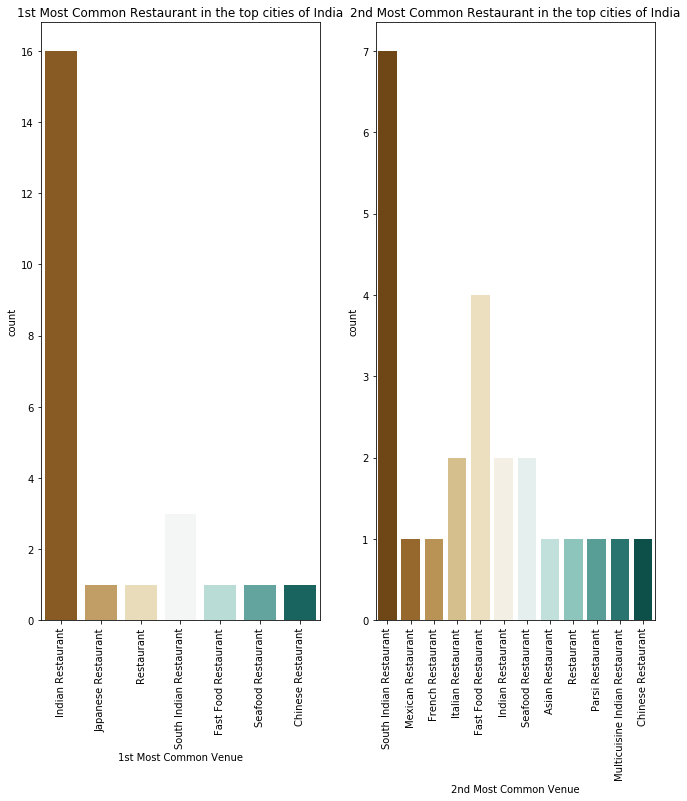

In [334]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 11))
ax1 = sns.countplot(x = '1st Most Common Venue', data = merged_data, 
                    palette = 'BrBG', ax = ax1)
ax1.set_title('1st Most Common Restaurant in the top cities of India')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax2 = sns.countplot(x = '2nd Most Common Venue', data = merged_data, 
                    palette = 'BrBG', ax = ax2)
ax2.set_title('2nd Most Common Restaurant in the top cities of India')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

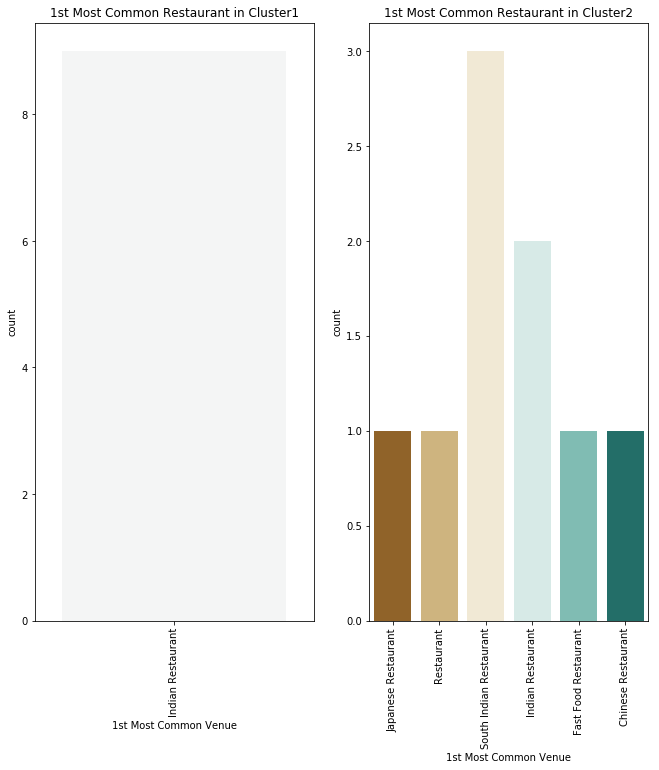

In [335]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 11))
ax1 = sns.countplot(x = '1st Most Common Venue', data = c0, 
                    palette = 'BrBG', ax = ax1)
ax1.set_title('1st Most Common Restaurant in Cluster1')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax2 = sns.countplot(x = '1st Most Common Venue', data = c1, 
                    palette = 'BrBG', ax = ax2)
ax2.set_title('1st Most Common Restaurant in Cluster2')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

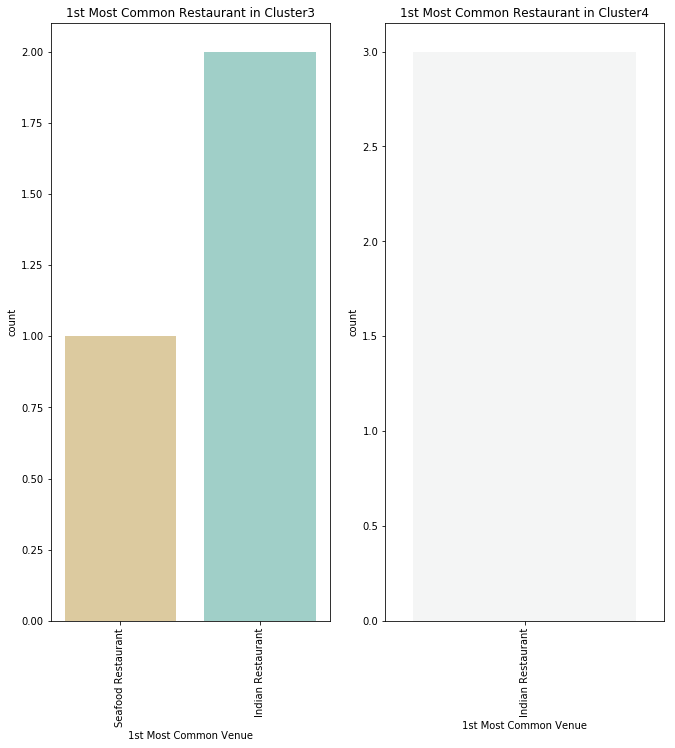

In [336]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 11))
ax1 = sns.countplot(x = '1st Most Common Venue', data = c2, 
                    palette = 'BrBG', ax = ax1)
ax1.set_title('1st Most Common Restaurant in Cluster3')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax2 = sns.countplot(x = '1st Most Common Venue', data = c3, 
                    palette = 'BrBG', ax = ax2)
ax2.set_title('1st Most Common Restaurant in Cluster4')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()